In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df_duplicate = df.copy(deep=True)
df_duplicate.loc[df_duplicate[df_duplicate.Country != 'United Kingdom'].index, 'Country'] = 'Other'

In [4]:
df_duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,Other
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,Other
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,Other
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,Other


Text(0.5, 1.0, 'Number of Order by Country')

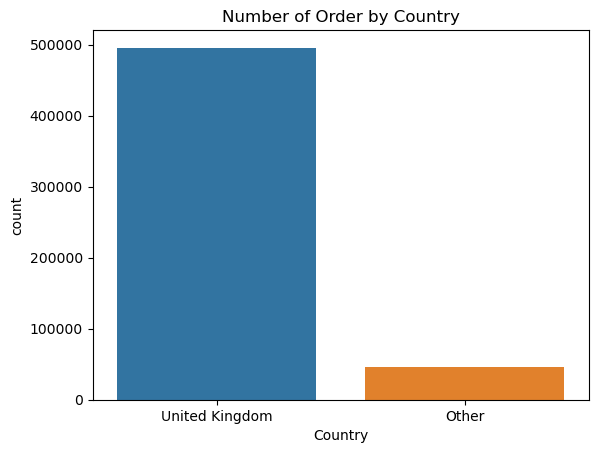

In [5]:
sns.countplot(df_duplicate, x='Country').set_title('Number of Order by Country')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.drop(df[df.CustomerID.isna()].index, inplace=True)
df.drop_duplicates(inplace=True)
df.drop(df[df["UnitPrice"] == 0].index, inplace=True)
df.drop(df[(df["InvoiceNo"].str[0]=='C')|(df["InvoiceNo"].str[0]=='A')].index, inplace=True)
df.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
392687,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
392688,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
392689,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
392690,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Text(0.5, 1.0, 'Distribution of Quantity')

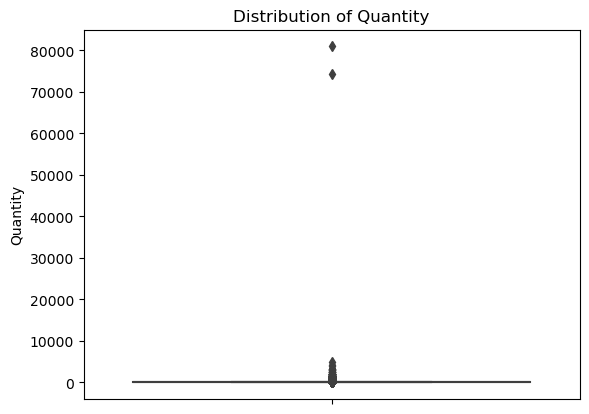

In [8]:
sns.boxplot(df, y='Quantity').set_title('Distribution of Quantity')

In [9]:
mean = df.Quantity.mean()
std = df.Quantity.std()
drop = df[df['Quantity'] >= mean+3*std]

df.drop(drop.index, inplace=True)

Text(0.5, 1.0, 'Distribution of Quantity (Post Dropping)')

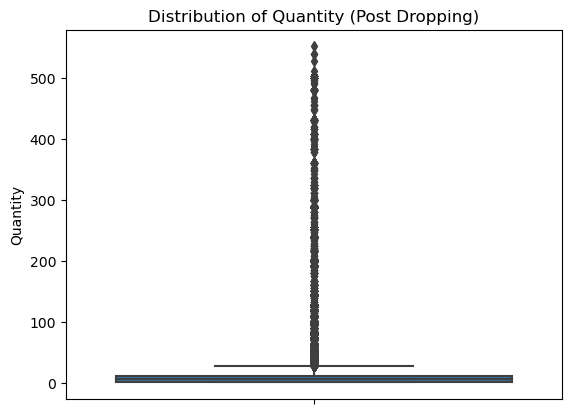

In [10]:
sns.boxplot(df, y='Quantity').set_title('Distribution of Quantity (Post Dropping)')

Text(0.5, 1.0, 'Distribution of Unit Price')

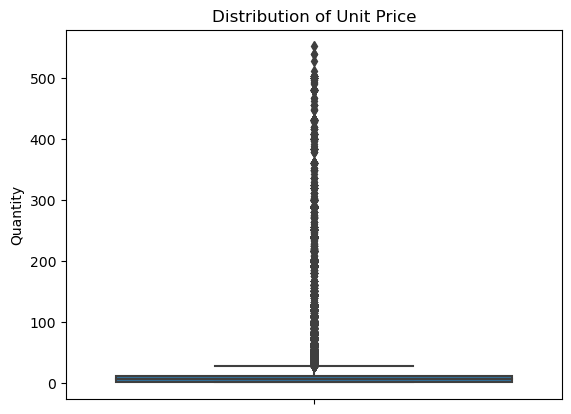

In [11]:
sns.boxplot(df, y='Quantity').set_title('Distribution of Unit Price')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392306 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392306 non-null  object        
 1   StockCode    392306 non-null  object        
 2   Description  392306 non-null  object        
 3   Quantity     392306 non-null  int64         
 4   InvoiceDate  392306 non-null  datetime64[ns]
 5   UnitPrice    392306 non-null  float64       
 6   CustomerID   392306 non-null  float64       
 7   Country      392306 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [13]:
df.Country.value_counts()

United Kingdom          348867
Germany                   9024
France                    8324
EIRE                      7223
Spain                     2479
Netherlands               2348
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1171
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     439
Austria                    398
Denmark                    380
Poland                     330
Japan                      309
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [14]:
df.StockCode.value_counts()

85123A    2018
22423     1713
85099B    1612
84879     1392
47566     1389
          ... 
90125E       1
90041        1
21310        1
37471        1
90033        1
Name: StockCode, Length: 3663, dtype: int64

In [15]:
df.StockCode.nunique()

3663

In [16]:
df[df.StockCode == '85123A'].UnitPrice.value_counts()

2.95    1646
2.55     357
5.79       9
3.20       4
3.24       2
Name: UnitPrice, dtype: int64

In [17]:
print(df.InvoiceDate.min())
print(df.InvoiceDate.max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [18]:
df_country_customers = pd.DataFrame(df.groupby('Country').nunique()).reset_index()
df_country_customers.loc[df_country_customers[df_country_customers.CustomerID <= 100].index ,'Country'] = 'Other'
df_country_customers.Country.value_counts()

Other             36
United Kingdom     1
Name: Country, dtype: int64

Text(0.5, 1.0, 'Customers in UK vs Elsewhere')

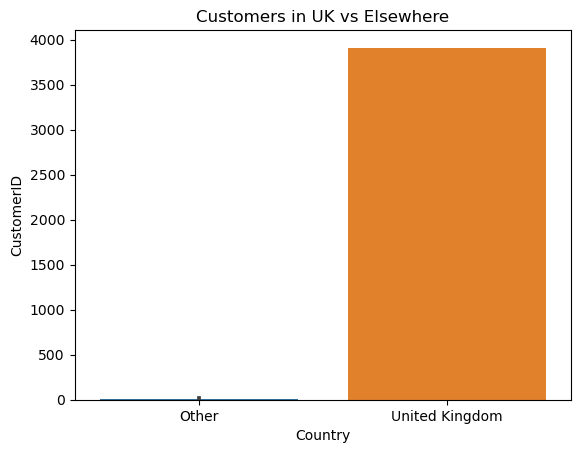

In [19]:
sns.barplot(data=df_country_customers, x='Country', y='CustomerID').set_title("Customers in UK vs Elsewhere")

In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392306.000000,392306.000000,392306.000000
mean,11.807589,3.127962,15287.412369
std,26.036754,22.252653,1713.316282
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,552.000000,8142.750000,18287.000000


In [21]:
df_uk = df[df['Country'] == 'United Kingdom'].drop('Country', axis=1)
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0


In [22]:
df_uk.shape

(348867, 7)

In [23]:
df_uk.groupby("StockCode")["Quantity"].sum().sort_values(ascending = False).head(10)

StockCode
85099B    38678
85123A    28217
84077     27966
84879     27580
22197     27417
22178     19956
21212     18722
23203     16972
22386     16575
84946     16220
Name: Quantity, dtype: int64

In [24]:
df_uk.to_csv('online retail v2.csv')